In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
data = pd.read_excel("DATA_1.xlsx")
datayedek = data.copy() #datamın yedeğini de aldım.
data.head()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,0
1,1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,0
2,2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,0
3,3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,0
4,4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,0


Öznitellikler:
yaş: müşterinin yaşı (sayısal)

iş: iş türü (kategorik) =12değişken

medeni durum: medeni durum (kategorik) =3 değişken

eğitim (kategorik) =4 değişken

varsayılan: temerrüde düşen kredi var mı? (ikili)

bakiye: avro cinsinden ortalama yıllık bakiye (sayısal)

konut: konut kredisi var mı? (ikili)

kredi: kişisel kredi var mı? (ikili)

iletişim: iletişim iletişim türü (kategorik) 3 degişken

gün: ayın son iletişim günü (sayısal)

ay: yılın son iletişim ayı (kategorik) 11 değişen

süre: saniye cinsinden son temas süresi (sayısal)

kampanya: bu kampanya sırasında ve bu müşteri için gerçekleştirilen kişi sayısı (sayısal, son iletişimi içerir)

Çıktı (istenen hedef):

y - müşteri vadeli mevduata abone oldu mu? (ikili)

1) Yatırım ürününü satın alma olasılığı daha yüksek olan müşteriler bulmakla da ilgileniyoruz. Satış temsilcimizin öncelik vermesi gereken müşteri segmentlerini belirleyin.

2) Müşterilerin satın almasını sağlayan nedir? Bize hangi özelliğe daha fazla odaklanmamız gerektiğini söyleyin.

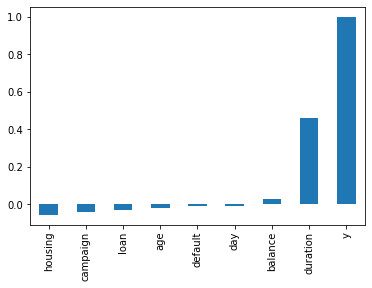

In [3]:
data =data.drop("Unnamed: 0",axis=1)
data.corr()["y"].sort_values().plot(kind="bar")

NUmerik değişkenlerin y ile olan korolasyonlarına bakarsak, Bu grafik bize özellikle ev kredisi olan müşterilerin
vadeli mevduata abone olma konuusnda  fazla gönülsüzolduklarını gösteririr.Aynı zamanda kampanya nın da vadeli mevduata abone olma konusunda negatif ilişki var.Daha sonra bireysel kredi olanlarda gönilsüzdür. Aynı zamanda yaş ile de negatif bir ilişkisi vardır. Yaş ilerledikçe müşteriler vadeli mevduata gönülsüzdür demek yanlış olmaz. Ben bakiye ile vadeli mevduat arasında ilişkinin kuvvetli olacağını düşünürdüm. Fakat bu grafikte şunu gördüm bakiye ile vadeli mevduata ktılma arasındaki ilişki dogrusaldır. Fakat beklediğim kadar kuvvetli değildir.


2)Temas süresi yani müşteri ile iletişim vadeli mevduat arasındaki ilişki oldukça kuvvetli ve pozitif yönlüdür. Satış temsilcilerinizin müşteri ile iletişime daha çok önem vermesinde fayda var.

In [4]:
kategorikdf = data.select_dtypes(include =["object"])

In [5]:
kategorikdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   job        40000 non-null  object
 1   marital    40000 non-null  object
 2   education  40000 non-null  object
 3   contact    40000 non-null  object
 4   month      40000 non-null  object
dtypes: object(5)
memory usage: 1.5+ MB


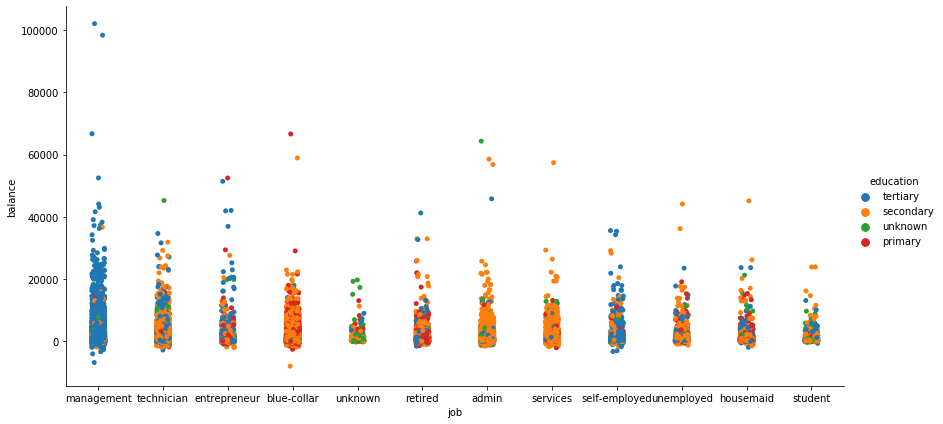

In [18]:
sbn.catplot(x="job",y="balance",hue ="education",data=data,height=6,aspect=2);

1) Bu grafikte meslek gruplarına göre banka hesapalrındaki bakiyelere baktık. Aynı zamanda eğitim seviyeslerini de bir diğer boyut olarak ekledim. Gördümki yüksek öğretim mezunu olup yöntici düzeyindeki insaların banka bakiyerinin 0-30000 arası yoğunlaştığını gördüm. Bakiye miktarı ile müşterinin vadeli mevduata geçme ihtimali doğu orantılı olduğu için Müşteri temsilcilerimi mesleği yönetici olan müşterileri arayarak teklifte buluna bilirler. 
daha detaylı yorumlar tabiki görselleştirilerek yapılabilir. 

Bu grafikte 